In [1]:
import torchaudio as ta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import IPython

/home/jp/miniconda3/envs/mgr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DS_LOCATION = "/media/Data/"

# FSDKaggle2018

In [3]:
fsdkaggle2018_root = "/media/Data/jp_dir/sounds"
fsdkaggle2018_train_csv = f"{fsdkaggle2018_root}/FSDKaggle2018.meta/train_post_competition.csv"
fsdkaggle2018_audio_train = f"{fsdkaggle2018_root}/FSDKaggle2018.audio_train"
train_meta = pd.read_csv(fsdkaggle2018_train_csv)
train_meta

,fname,label,manually_verified,freesound_id,license
0,00044347.wav,Hi-hat,0,28739,Attribution
1,001ca53d.wav,Saxophone,1,358827,Attribution
2,002d256b.wav,Trumpet,0,10897,Creative Commons 0
3,0033e230.wav,Glockenspiel,1,325017,Attribution
4,00353774.wav,Cello,1,195688,Attribution
...,...,...,...,...,...
9468,ffec59fb.wav,Fireworks,0,343090,Creative Commons 0
9469,fff37590.wav,Hi-hat,0,33136,Attribution
9470,fff44ac6.wav,Laughter,0,133674,Attribution
9471,fff6a13d.wav,Chime,0,14640,Attribution


/tmp/ipykernel_945990/3353598005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=label_counts.index, x=label_counts.values, palette='viridis')


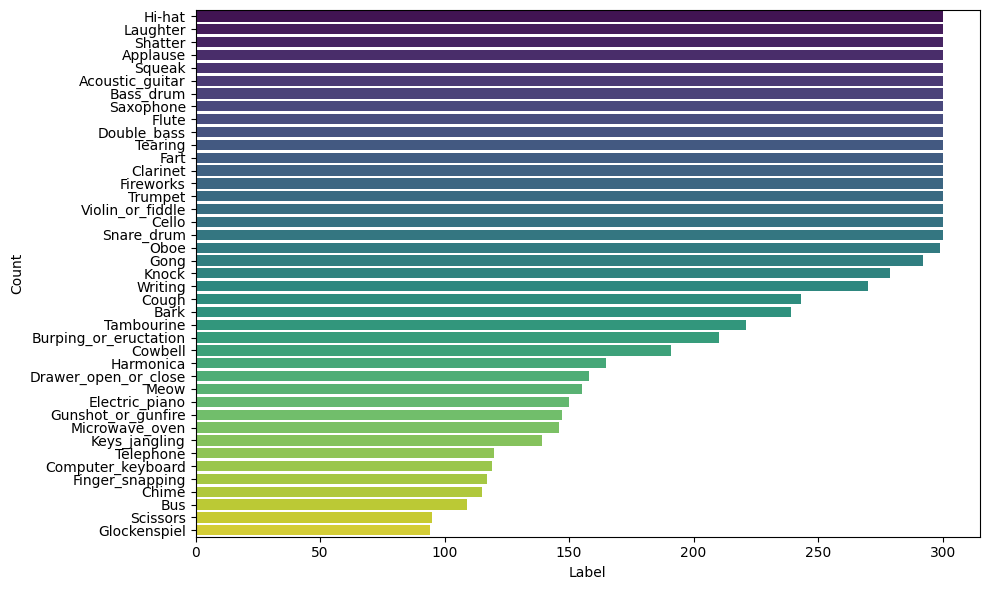

In [4]:
label_counts = train_meta["label"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=label_counts.index, x=label_counts.values, palette='viridis')
plt.xlabel('Label')
plt.ylabel('Count')
# plt.title('Occurrence Counts of Different Labels')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
percussive_labels = ["Hi-hat", "Bass_drum", "Snare_drum", "Gong", "Tambourine", "Cowbell"]
train_meta_percussive = train_meta[train_meta["label"].isin(percussive_labels) & (train_meta["manually_verified"] == 1)]
train_meta_percussive

,fname,label,manually_verified,freesound_id,license
10,006f2f32.wav,Hi-hat,1,138726,Attribution
41,0160d55e.wav,Gong,1,152800,Creative Commons 0
61,01c2f88b.wav,Bass_drum,1,91667,Creative Commons 0
83,024c4c6d.wav,Bass_drum,1,49750,Attribution
84,024da466.wav,Tambourine,1,352296,Creative Commons 0
...,...,...,...,...,...
9431,ff0d3545.wav,Snare_drum,1,265179,Creative Commons 0
9433,ff11628d.wav,Bass_drum,1,91617,Creative Commons 0
9438,ff3f21e7.wav,Snare_drum,1,13208,Creative Commons 0
9440,ff462e1b.wav,Cowbell,1,75338,Creative Commons 0


In [40]:
all_audio_files = [ta.load(f"{fsdkaggle2018_audio_train}/{sample_meta['fname']}") for _, sample_meta in train_meta_percussive.iterrows()]
sub2s = [(audio, sr) for audio, sr in all_audio_files if audio.shape[1] <= 2 * sr]
len(sub2s)

313

In [52]:
import random

# sample_meta = train_meta_percussive.iloc[random.randint(0, len(train_meta_percussive) - 1)]
# audio, sr = ta.load(f"{fsdkaggle2018_audio_train}/{sample_meta['fname']}")
# print(sr, sample_meta["label"])
audio, sr = sub2s[random.randint(0, len(sub2s) - 1)]
IPython.display.Audio(audio, rate=sr)